***Breast Cancer Dataset - EDA***

This Section performs a comprehensive Exploratory Data Analysis (EDA) on the uploaded dataset. It includes:

Data overview & structure
Summary statistics
Missing values & duplicates check
Categorical vs Numerical variable analysis
Correlation heatmap
Visualization of distributions & relationships
Insights and interpretations

In [278]:
# importing liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [279]:
df = pd.read_csv("data.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [281]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [282]:
df.describe(include = object)

,diagnosis
count,569
unique,2
top,B
freq,357


The dataset contains only one categorical column, “diagnosis”, which represents the type of disease (B or M). There are 569 entries in total, and the column has 2 unique categories, with “B” being the most frequent (357 cases).

In [283]:
print(f"Missing Values per Column: {df.isnull().sum()}")
print(f"\nDuplicated Rows: {df.duplicated().sum()}")

Missing Values per Column: id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dime

In [284]:
Y=df["diagnosis"]
cat_cols=Y
X=df.drop(["id", "diagnosis", "Unnamed: 32" ],axis=1)

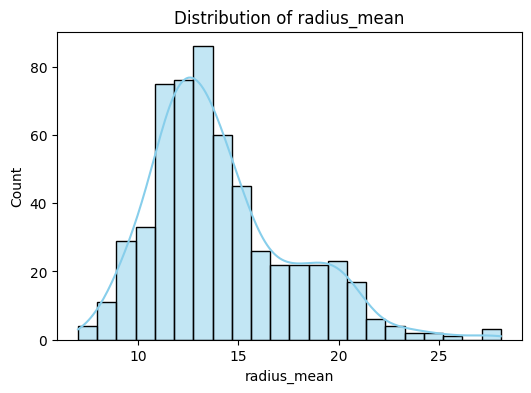

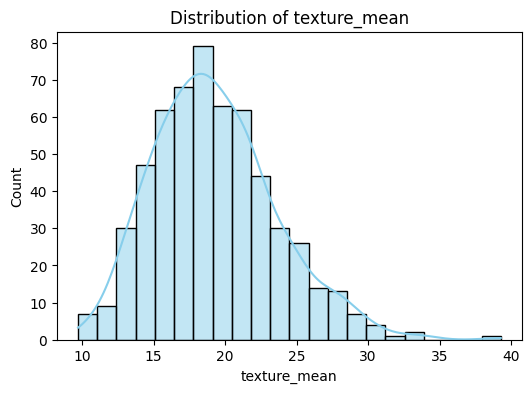

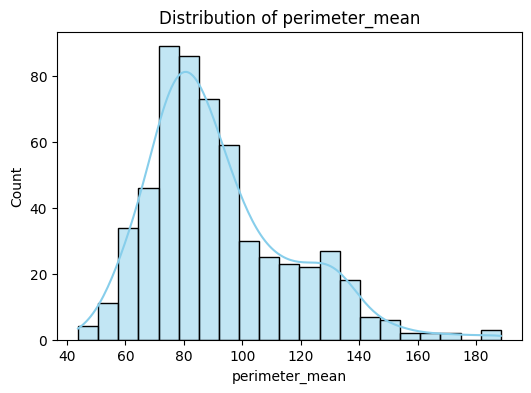

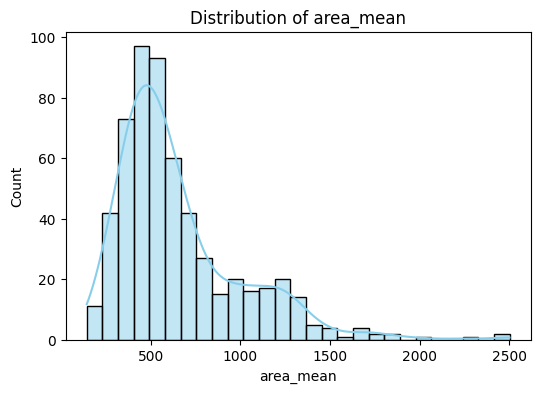

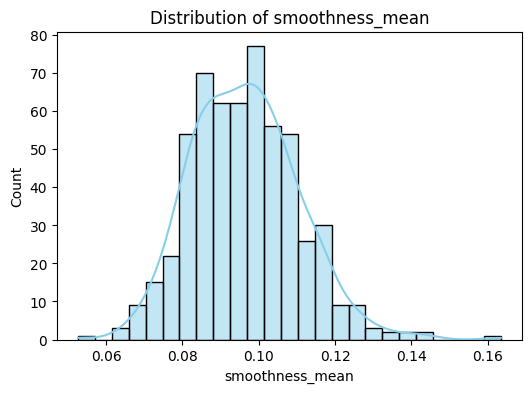

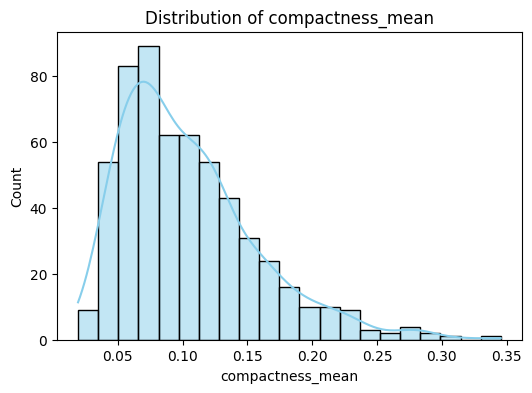

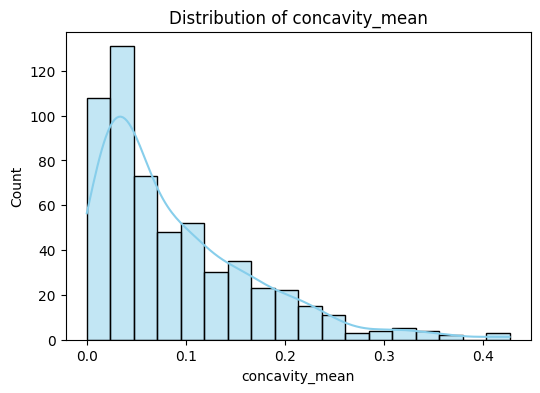

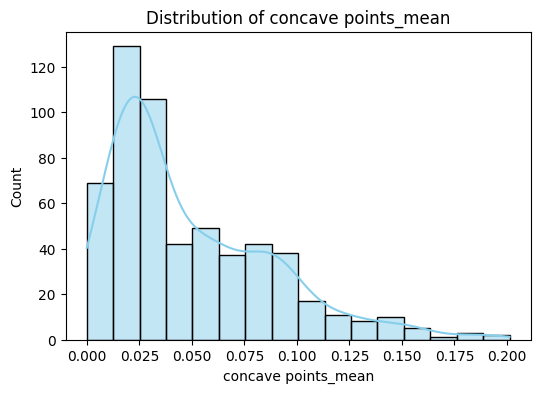

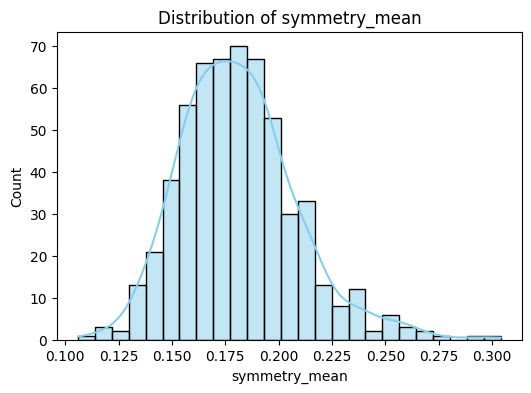

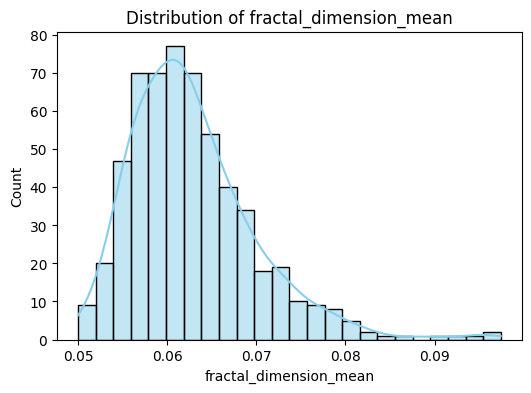

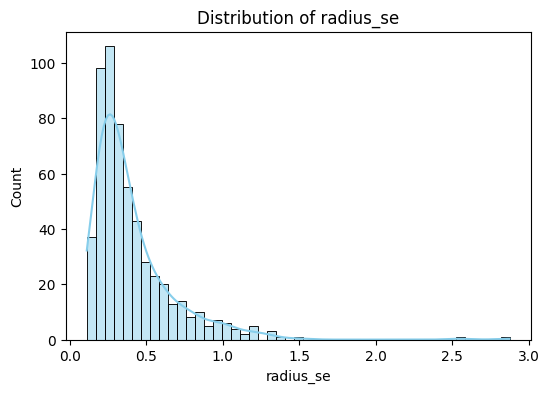

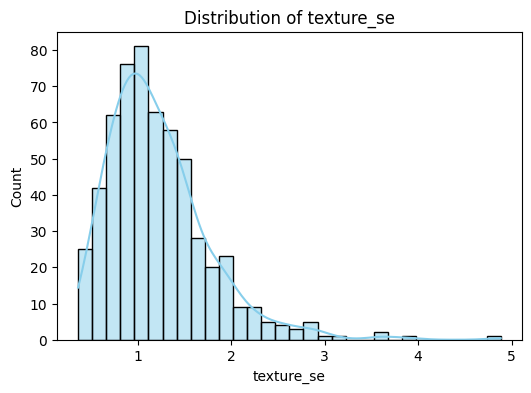

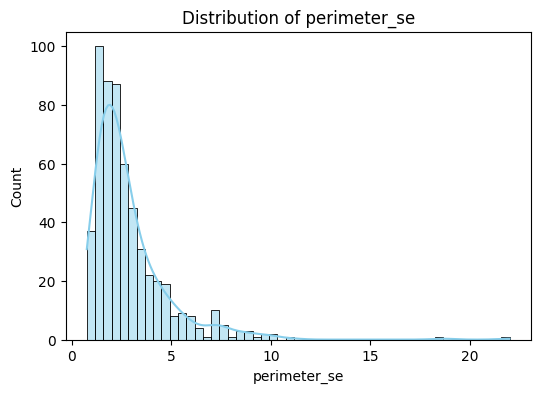

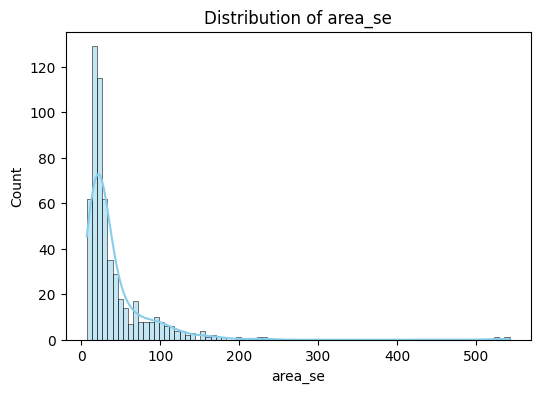

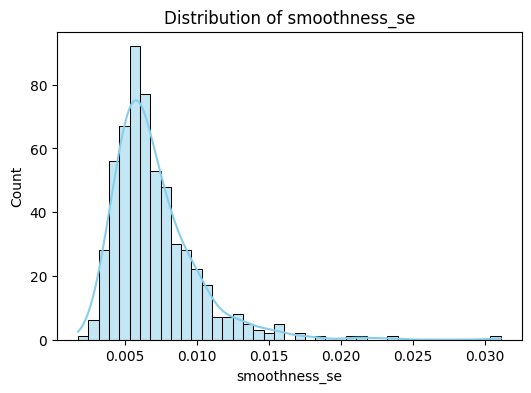

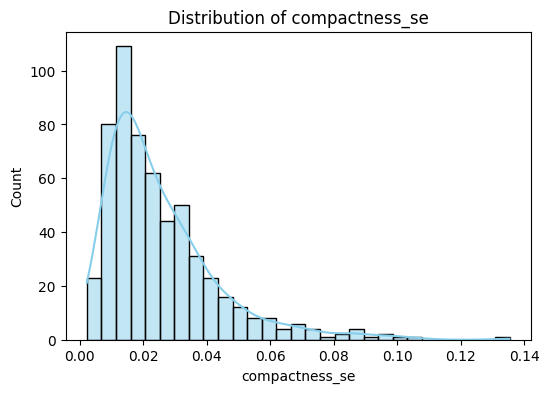

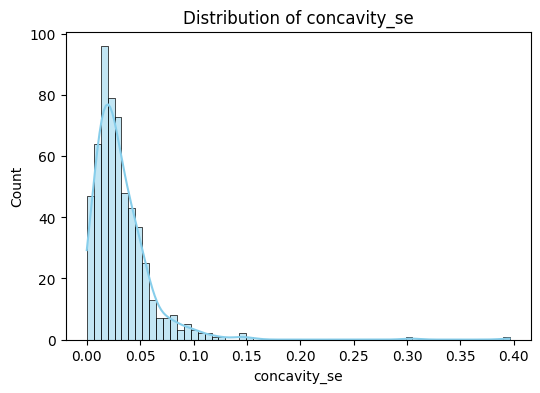

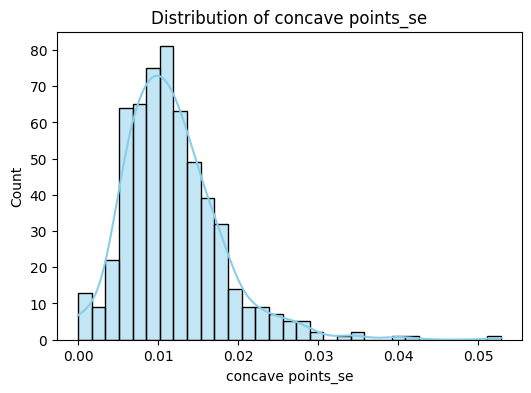

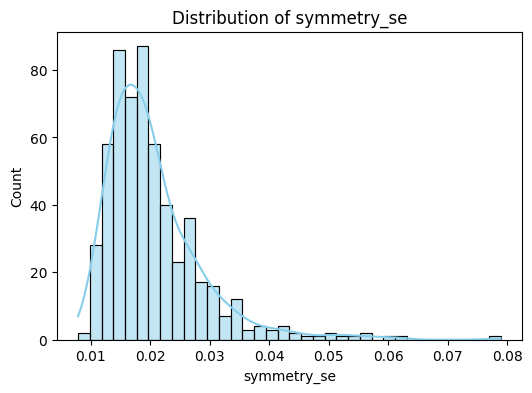

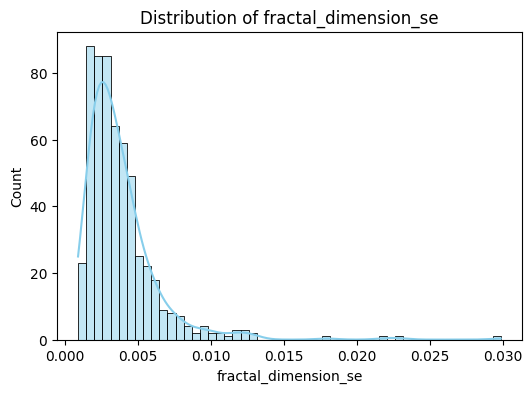

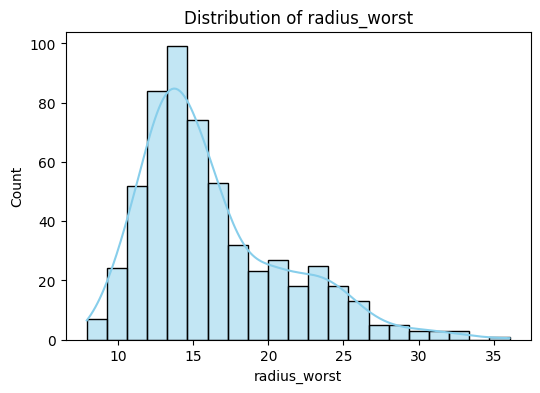

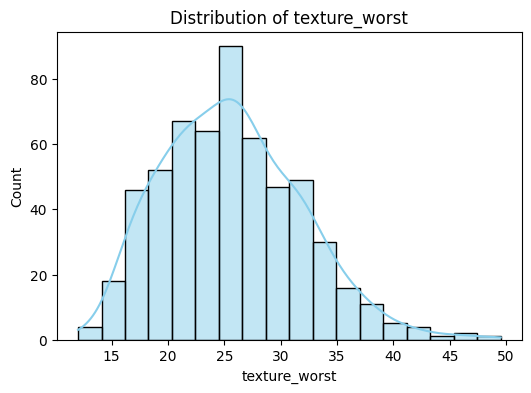

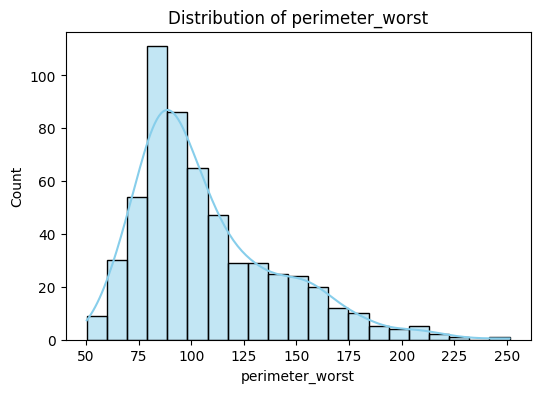

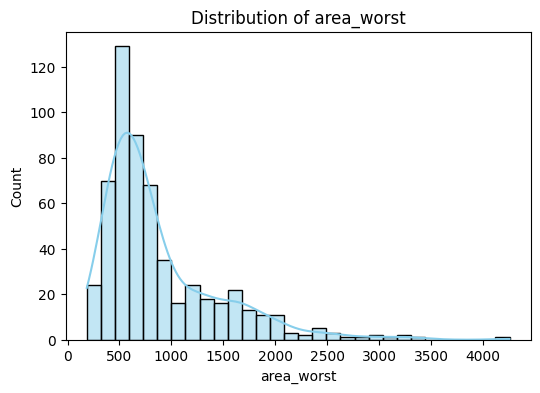

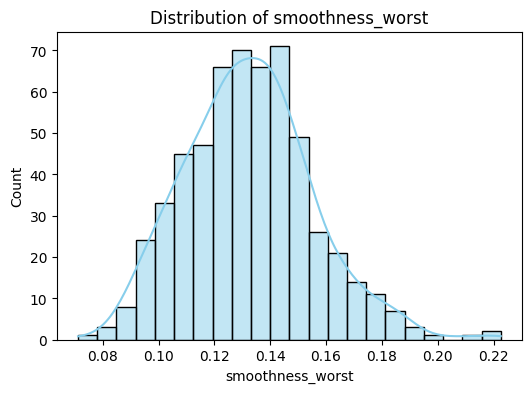

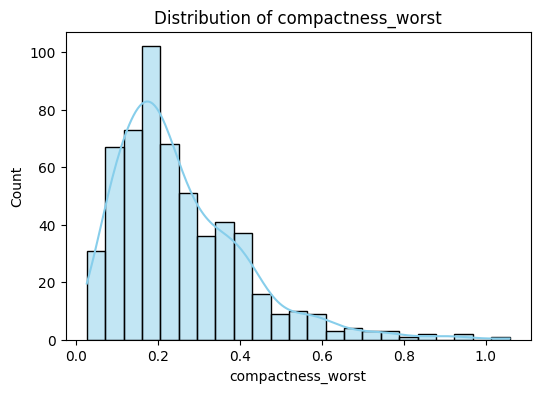

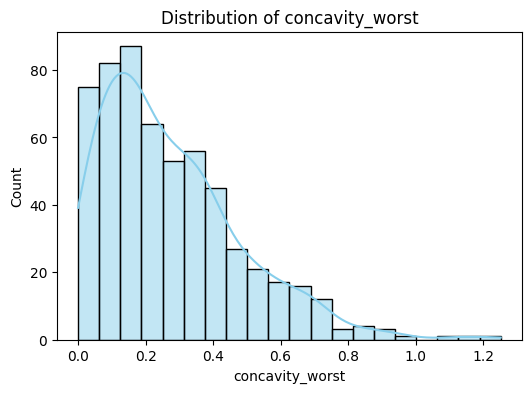

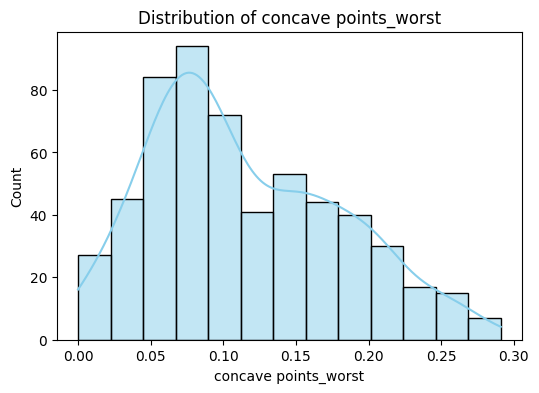

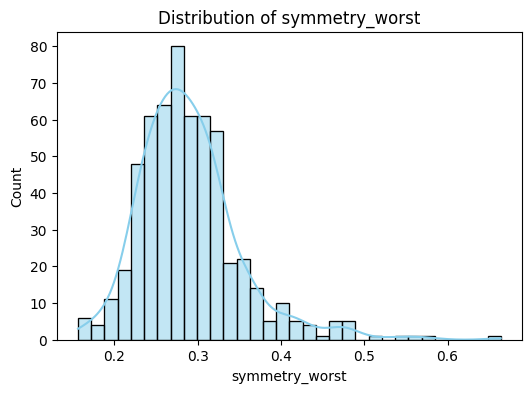

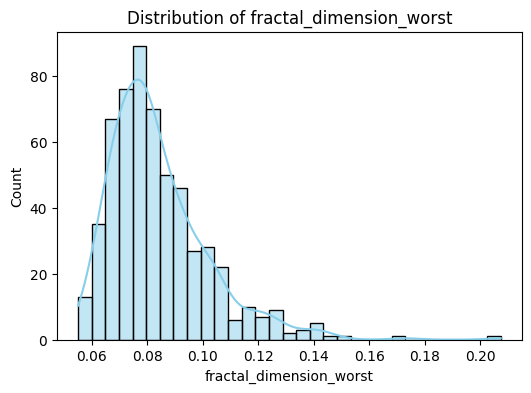

In [285]:
num_cols = X.select_dtypes(include=[np.number]).columns
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], color='skyblue', kde=True, edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.show()

In [286]:
print(num_cols)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'], dtype='object')


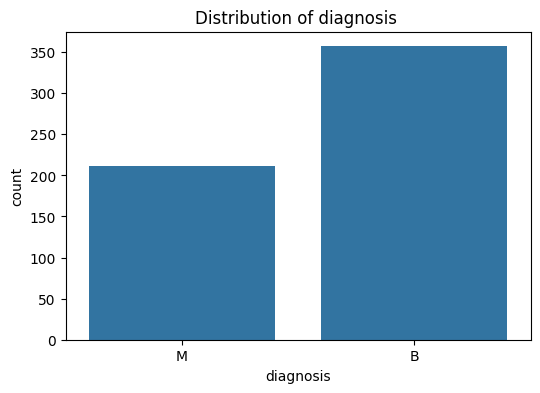

In [287]:
plt.figure(figsize=(6, 4))
sns.countplot(x = Y)
plt.title("Distribution of diagnosis ")
plt.show()

Boxplots are used to visualize the relationship between each numerical feature and the target variable (diagnosis).
If there’s a clear difference between the distributions of benign (B) and malignant (M) tumors → the feature is useful for prediction.
If the difference is small or overlapping, the feature is less important.
If there are many outliers, they may distort the model and should be handled or removed.

<Axes: >

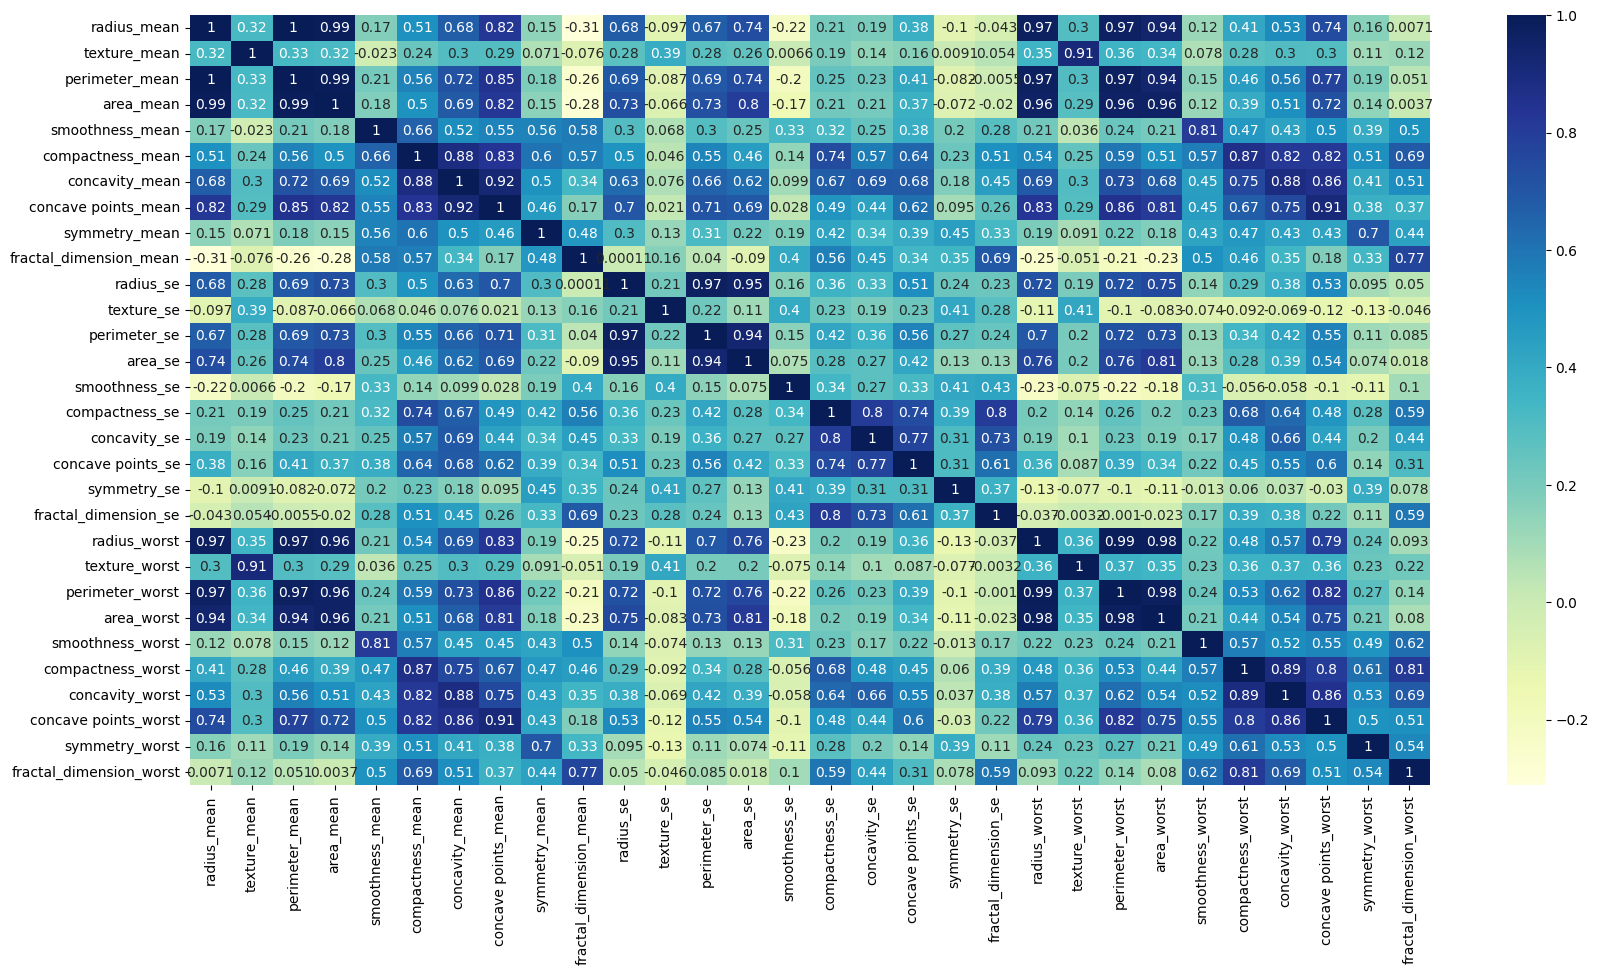

In [288]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(), annot=True, cmap="YlGnBu")

modeling

In [289]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=45)

In [291]:
print('Train dataset shape:',X_train.shape)
print('Test dataset shape', y_train.shape)

Train dataset shape: (398, 30)
Test dataset shape (398,)


In [292]:
sc = MinMaxScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

LOGISTIC REGRESSION

In [293]:
Log_Reg_cls = LogisticRegression(penalty='elasticnet', solver='saga', C=0.8, l1_ratio=0.8)
Log_Reg_cls.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



LogisticRegression(C=0.8, l1_ratio=0.8, penalty='elasticnet', solver='saga')

In [294]:
y_pred1= Log_Reg_cls.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           B       0.97      1.00      0.99       110
           M       1.00      0.95      0.97        61

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



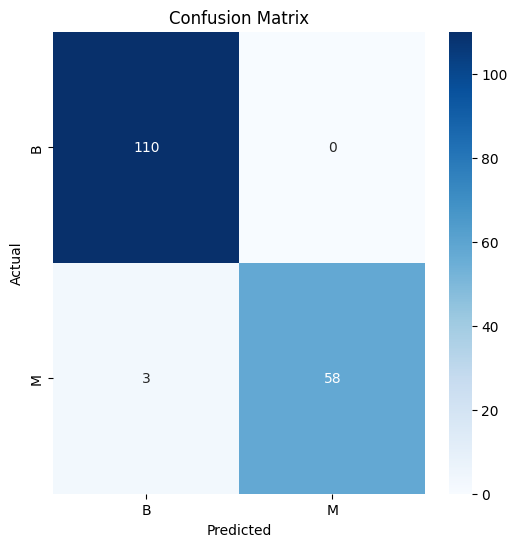

In [295]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, fmt="d", cmap="Blues", xticklabels=['B','M'], yticklabels=['B','M'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

KNN classifier

In [296]:
knn_cls = KNeighborsClassifier(n_neighbors=8)
knn_cls.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [297]:
y_pred2= knn_cls.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           B       0.96      0.99      0.97       110
           M       0.98      0.92      0.95        61

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



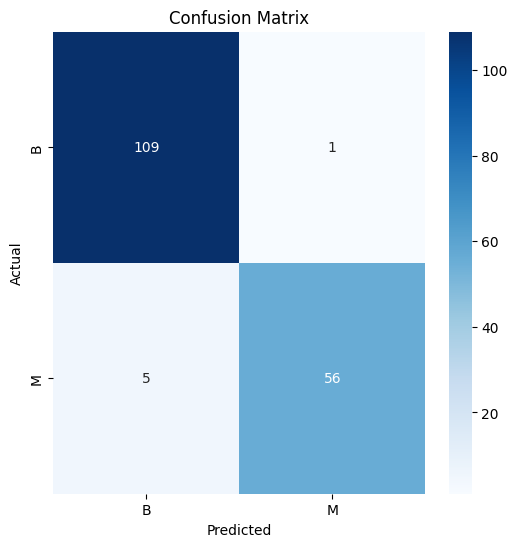

In [298]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt="d", cmap="Blues", xticklabels=['B','M'], yticklabels=['B','M'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

SVM

In [299]:
svc_cls = SVC(kernel='linear')
svc_cls.fit(X_train,y_train)

SVC(kernel='linear')

In [300]:
y_pred3= svc_cls.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           B       0.98      1.00      0.99       110
           M       1.00      0.97      0.98        61

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



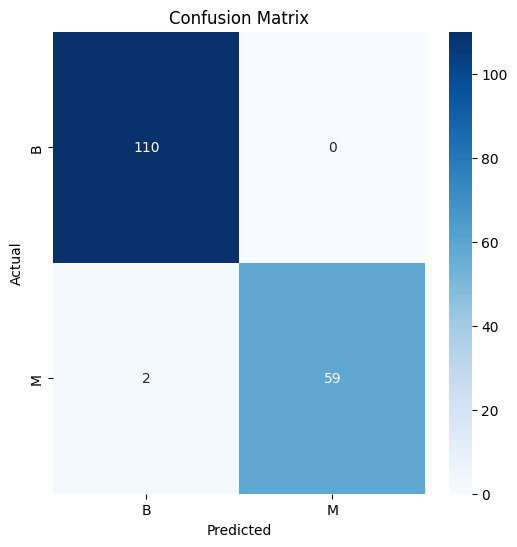

In [301]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, fmt="d", cmap="Blues", xticklabels=['B','M'], yticklabels=['B','M'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

SGD Classifier

In [302]:
sgd_cls = SGDClassifier(loss='log_loss', average=True)
sgd_cls.fit(X_train,y_train)

SGDClassifier(average=True, loss='log_loss')

In [303]:
y_pred4= sgd_cls.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           B       0.98      1.00      0.99       110
           M       1.00      0.97      0.98        61

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



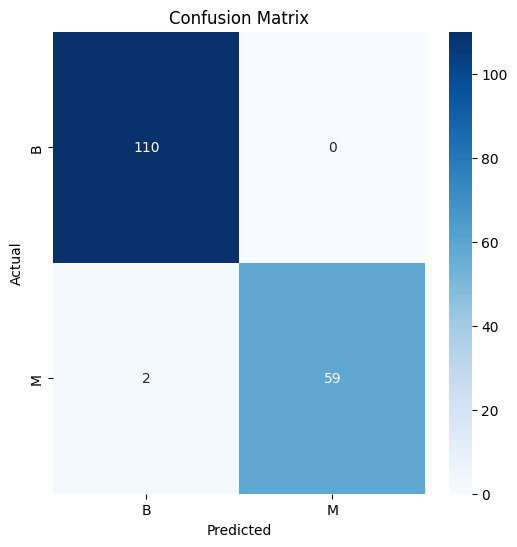

In [304]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred4), annot=True, fmt="d", cmap="Blues", xticklabels=['B','M'], yticklabels=['B','M'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()